<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Описание данных
Технологический процесс
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
  
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота
- Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков**

**Наименование признаков должно быть такое:**
- [этап].[тип_параметра].[название_параметра]
- Пример: rougher.input.feed_ag
- Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики
- Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

import warnings #чтоб на ошибки не ругался
warnings.filterwarnings("ignore")

In [2]:
state = np.random.RandomState(12345)
pd.set_option('display.max_columns', None)
df_tr = pd.read_csv('/Users/aleksandrivanov/Downloads/gold_recovery_train_new.csv')
df_ts = pd.read_csv('/Users/aleksandrivanov/Downloads/gold_recovery_test_new.csv')
df_full = pd.read_csv('/Users/aleksandrivanov/Downloads/gold_recovery_full_new.csv')

In [3]:
display(df_tr)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
display(df_ts)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [5]:
display(df_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Первые выводы, количество строчек в трейн + тест совпадают, если просуммировать, а вот количество столбцов отличается, 53 против 87

In [6]:
print(df_tr.duplicated().sum())
print(df_ts.duplicated().sum())
print(df_full.duplicated().sum())

0
0
0


Явные дубликаты отсутствуют

In [7]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Сравниваем столбцы, в тестовой выборки отсуюствуют столбцы со значениями output и calculation

In [10]:
display(df_tr.describe())
print()
display(df_ts.describe())
print()
display(df_full.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

В первом приблиении к данным с точки зрения выборосов вопросов пока нет, если смотреть по табличке full верхние значения лежат близко с 75% 

Посмотрим что с пропусками

In [11]:
df_full.isnull().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [12]:
df_ts.isnull().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [13]:
df_tr.isnull().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

пропуски есть, надо будет что-то с ними делать, но ими займусь позже
Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.


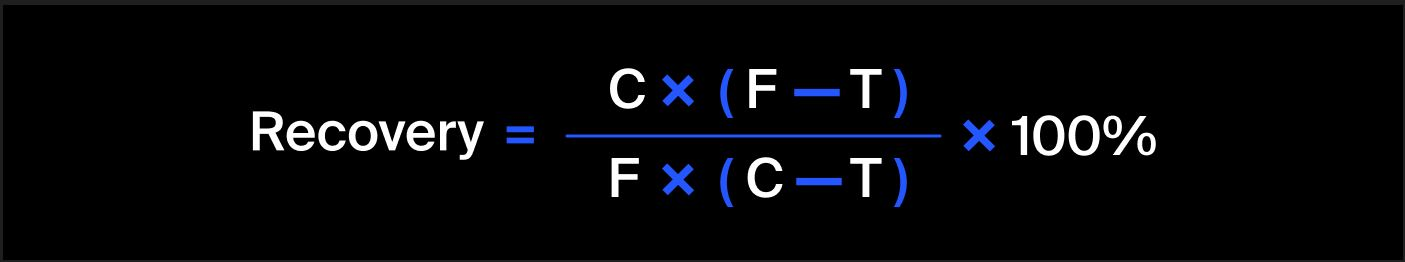

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

In [14]:
c = df_tr['rougher.output.concentrate_au']
f = df_tr['rougher.input.feed_au']
t = df_tr['rougher.output.tail_au']

In [15]:
recovery = (c*(f-t))/(f*(c-t))*100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [16]:
mae_tr_recovery = mean_absolute_error(recovery,df_tr['rougher.output.recovery'])
print('MAE:',mae_tr_recovery)

MAE: 9.649249696983847e-15


Разница между посчитанными данными и фактическими получилась очень маленькая

In [17]:
df_full.corr()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.063570,0.380142,-0.038373,0.185952,0.334596,-0.051855,0.028890,0.206569,0.071158,0.127827,0.040543,0.127175,0.509877,-0.152814,0.332771,-0.200367,0.043138,-0.023182,0.175824,0.163903,0.175978,0.039789,0.194615,0.058284,0.154360,0.036542,0.110360,-0.001388,-0.014190,-0.034702,-0.039130,0.158668,0.456279,0.074866,-0.167154,-0.043895,-0.036783,0.315817,-0.096561,0.093678,-0.113477,0.114032,0.315558,-0.127291,-0.018497,0.044347,0.084148,0.204522,-0.049453,0.008952,0.125401,0.102807,-0.206426,0.086768,0.094650,0.079634,0.099465,0.094354,0.094249,0.135264,0.104504,0.091003,0.097289,-0.039046,-0.286238,0.157687,0.048926,-0.058101,0.024641,-0.016135,0.024709,0.061833,0.116037,0.065680,0.138392,0.027343,0.104118,0.029887,-0.063246,-0.004246,0.184332,0.003693,0.156471,0.162591,0.059581
final.output.concentrate_pb,0.063570,1.000000,-0.048586,0.374400,0.151987,-0.126886,0.221372,0.094385,-0.047446,0.079160,0.037710,-0.083249,-0.080320,-0.036563,0.377527,-0.110350,0.010703,-0.021533,0.026415,-0.048739,-0.138511,-0.002548,0.075751,-0.02

Корреляция 1 к 1 нигде не бросается в глаза, где-то зависимость сильнее, где-то слабее

Стобец дата не несет никакие смысловые нагрузки, его из обучающей выборки можно убрать, но перед этим надо кое-что сделать для тестовой выборки в далеком будущем

In [18]:
df_ts = df_ts.merge(df_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [19]:
#отлично, два нужных столбца добавились для будущей тест сборки
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [20]:
df_tr = df_tr.drop(['date'], axis =1)
df_ts = df_ts.drop(['date'], axis =1)
df_full = df_full.drop(['date'], axis =1)

Обработаем всё-таки пропуски, есть два варианта: медианой, но либо продублируем ближайшие к пропуску (из тз Соседние по времени параметры часто похожи.)
PS пытался заменить методом с помощью random, но он только с int числами, можно ли здесь как-то это сделать?
Была идея сделать рандом в интервале от 0.3*медиана и до 1.3*медиана

In [21]:
for i in df_tr:
    df_tr[i].fillna(method = 'ffill', inplace = True)

In [22]:
for i in df_ts:
    df_ts[i].fillna(method = 'ffill', inplace = True)

In [23]:
for i in df_full:
    df_full[i].fillna(method = 'ffill', inplace = True)

In [24]:
df_full

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646

In [25]:
df_tr.isnull().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

Выводы по разделу:

Большое количество данных, т.е. в будущем, скорей всего не потребуются методы для увеличения выборки. В целом у нас задача регрессии 

пропуски есть, но их немного. Для их обработки было несколько вариантов: заменить смежными значениями, либо заменить медианой, пока выбрал смежными.

Явные дубликаты отсутствуют

Удалил стобец Data 

Корреляция 1 в 1 отсутствует

Посчитал значение MAE, показатель получился очень низким

добавил из таблицы Full значения по требуемогу параметру в таблицу тест

## Анализ данных

2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
2.2.  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Вспомним ещё раз процесс:

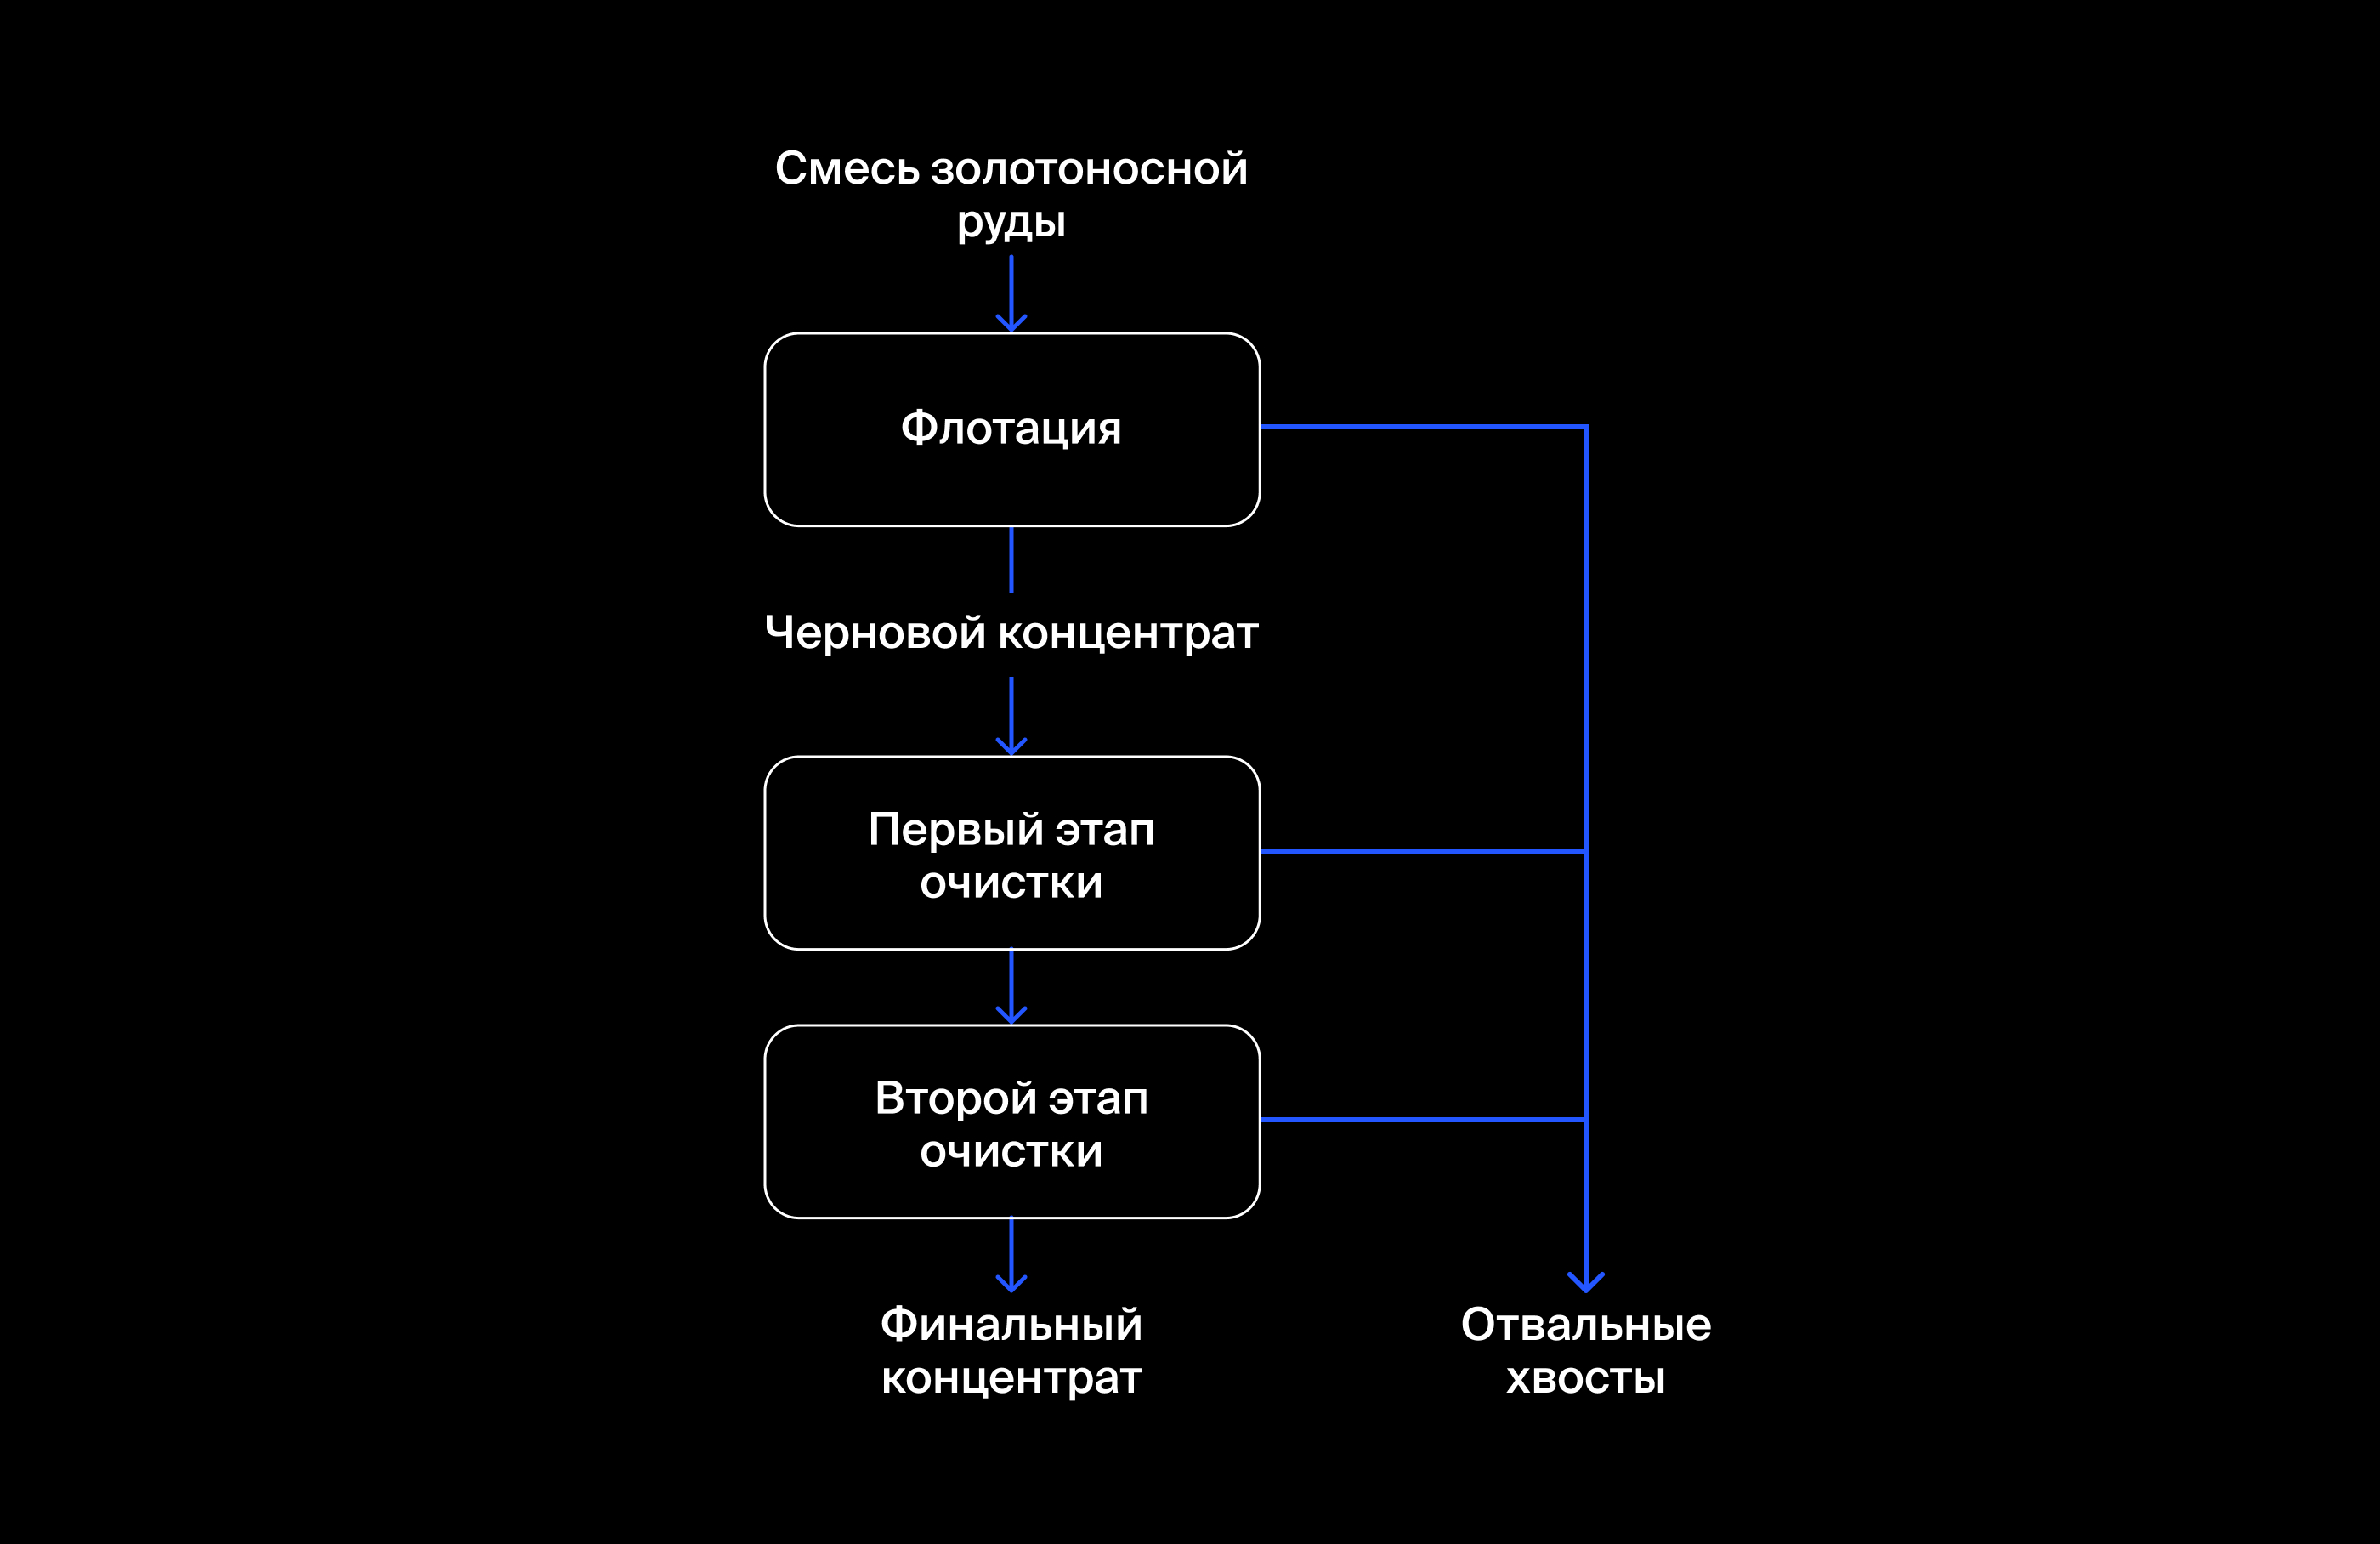

Так, нам надо изучить Au, Ag и Pb, посмотреть как их концентрация менялась на разных этапах, посмотрим какие столбцы из df_full 
нам пригодятся для исследования

In [26]:
df_full.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

Пытался придумать, как можно сделать фильтрацию, чтоб в список добавить все колонки со значением "Au" и так далее и потом дропнуть хвостовые значения, но пока не придумал как, поэтому сделаем 3 отдельных списка руками

In [27]:
list_with_au1 =[]
list_with_ag1 = []
list_with_pb1 = []

In [28]:
for i in df_full.columns:
    if 'concentrate_au' in i:
        list_with_au1.append(i)
    elif 'concentrate_ag' in i:
        list_with_ag1.append(i)
    elif 'concentrate_pb' in i:
        list_with_pb1.append(i)


In [29]:
list_with_au = df_full[list_with_au1]

In [30]:
list_with_ag = df_full[list_with_ag1]

In [31]:
list_with_pb = df_full[list_with_pb1]

оптимальнее варианта кода я не придумал =) 


In [32]:
list_with_au

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.output.concentrate_au
0,42.192020,34.174427,19.793808
1,42.701629,34.118526,20.050975
2,42.657501,33.969464,19.737170
3,42.689819,28.260743,19.320810
4,42.774141,33.044932,19.216101
...,...,...,...
19434,46.713954,32.940215,18.603550
19435,46.866780,32.925325,18.441436
19436,46.795691,31.856742,15.111231
19437,46.408188,30.770892,17.834772


In [33]:
#list_with_ag = df_full[['final.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag']]

In [34]:
list_with_ag

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.output.concentrate_ag
0,6.055403,8.547551,11.500771
1,6.029369,8.558743,11.615865
2,6.055926,8.603505,11.695753
3,6.047977,7.221879,11.915047
4,6.148599,9.089428,12.411054
...,...,...,...
19434,3.224920,6.559174,11.124896
19435,3.195978,6.612376,11.425983
19436,3.109998,7.128896,8.523497
19437,3.367241,7.490444,11.658799


In [35]:
# #list_with_pb = df_full[['final.output.concentrate_pb',
#  'primary_cleaner.output.concentrate_pb',
#  'rougher.output.concentrate_pb']]

In [36]:
list_with_pb

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.output.concentrate_pb
0,9.889648,10.389648,7.101074
1,9.968944,10.497069,7.278807
2,10.213995,10.354494,7.216833
3,9.977019,8.496563,7.175616
4,10.142511,9.986786,7.240205
...,...,...,...
19434,11.356233,12.445966,10.984003
19435,11.349355,12.623947,10.888213
19436,11.434366,12.633558,8.955135
19437,11.625587,12.012378,10.655377


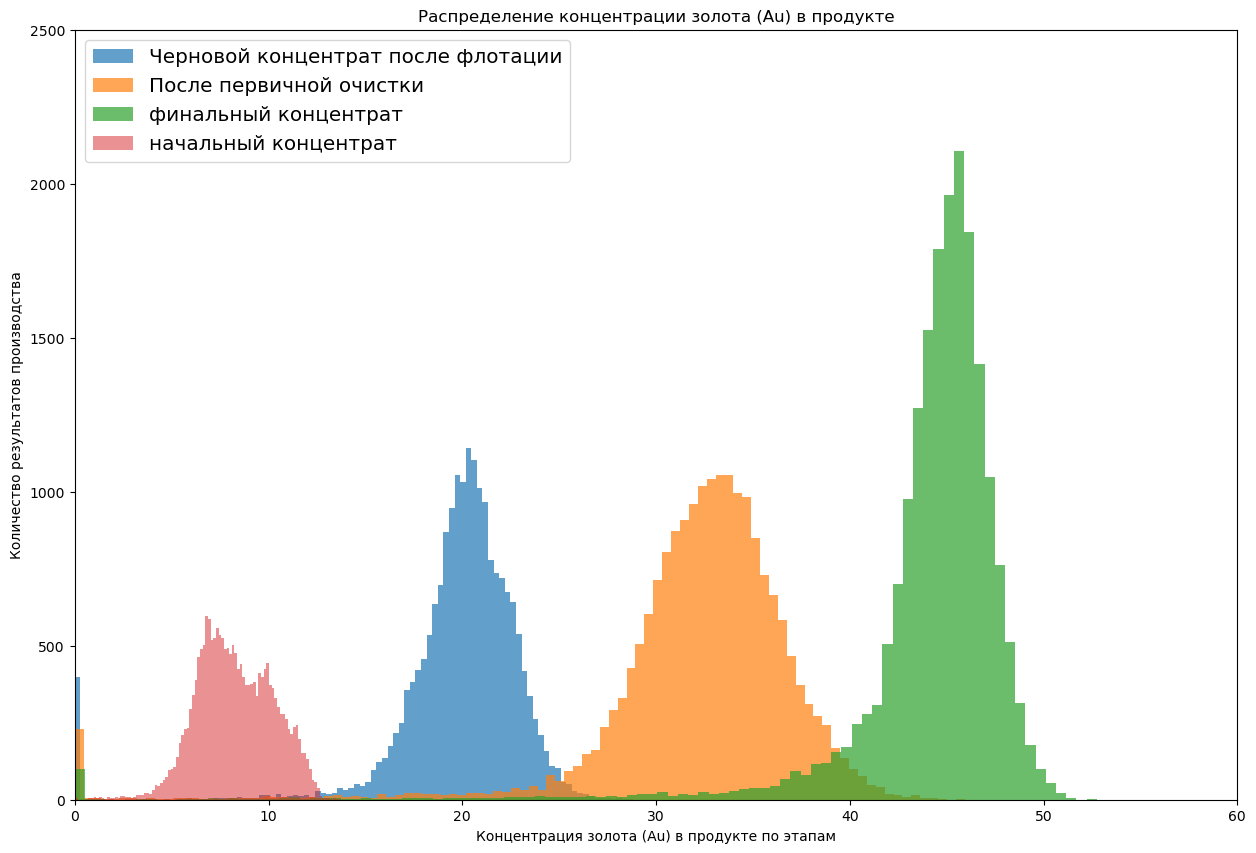

In [37]:
plt.figure(figsize=[15,10])
plt.xlim([0, 60])
plt.ylim([0, 2500])
plt.hist(list_with_au['rougher.output.concentrate_au'], bins=100, label = 'Черновой концентрат после флотации', alpha=0.7)
plt.hist(list_with_au['primary_cleaner.output.concentrate_au'], bins=100, label = 'После первичной очистки', alpha=0.7)
plt.hist(list_with_au['final.output.concentrate_au'], bins=100, label = 'финальный концентрат', alpha=0.7)
plt.hist(df_full['rougher.input.feed_au'], bins=100, label = 'начальный концентрат', alpha=0.5)
plt.xlabel('Концентрация золота (Au) в продукте по этапам')
plt.ylabel('Количество результатов производства')
plt.legend(loc='upper left', fontsize='x-large')
plt.title('Распределение концентрации золота (Au) в продукте')
plt.show()

Концентрация золота увеличивается, это прям отличный показатель, мы двигаемся в нужном направлении :-)
Смущают эти 0 в начале графика, возможно, выбросы, либо потора, которая вообще без драг металла

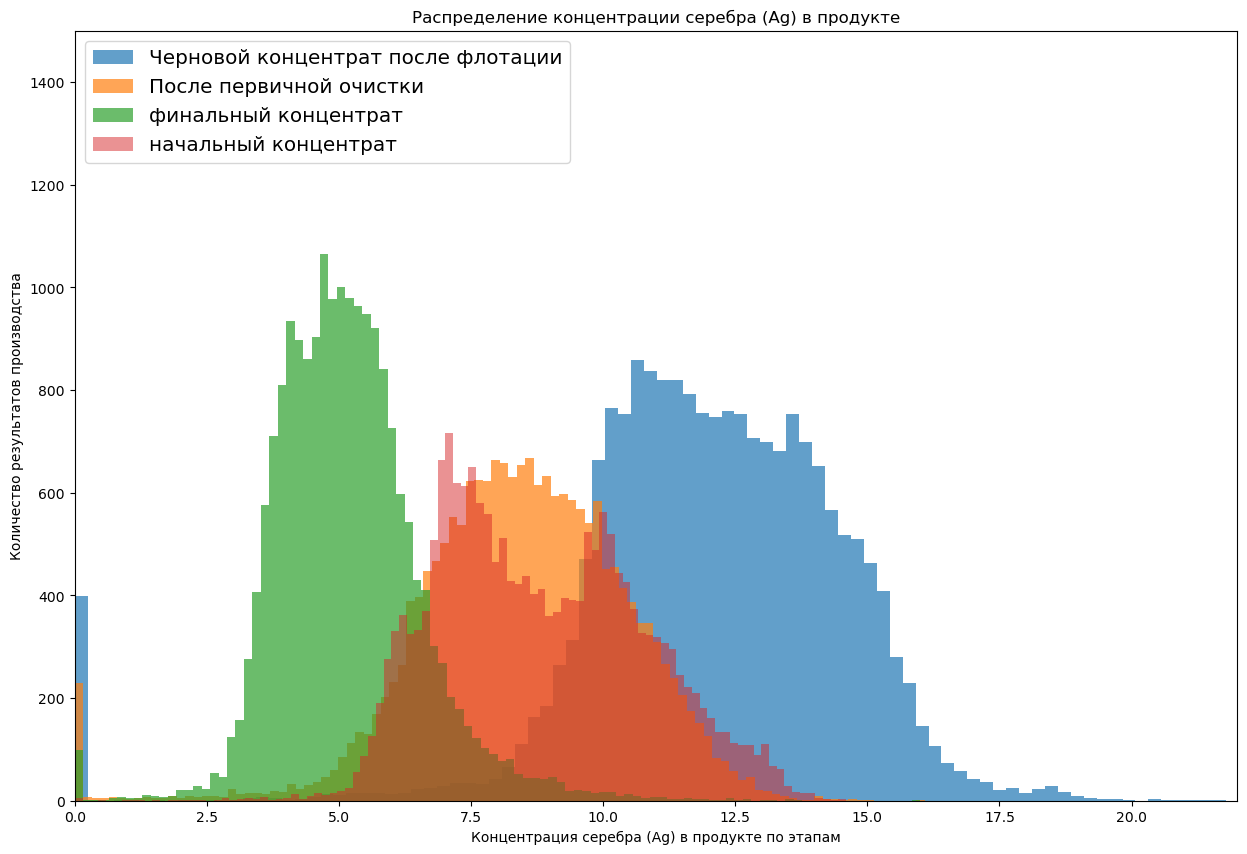

In [38]:
plt.figure(figsize=[15,10])
plt.xlim([0, 22])
plt.ylim([0, 1500])
plt.hist(list_with_ag['rougher.output.concentrate_ag'], bins=100, label = 'Черновой концентрат после флотации', alpha=0.7)
plt.hist(list_with_ag['primary_cleaner.output.concentrate_ag'], bins=100, label = 'После первичной очистки', alpha=0.7)
plt.hist(list_with_ag['final.output.concentrate_ag'], bins=100, label = 'финальный концентрат', alpha=0.7)
plt.hist(df_full['rougher.input.feed_ag'], bins=100, label = 'начальный концентрат', alpha=0.5)
plt.xlabel('Концентрация серебра (Ag) в продукте по этапам')
plt.ylabel('Количество результатов производства')
plt.legend(loc='upper left', fontsize='x-large')
plt.title('Распределение концентрации серебра (Ag) в продукте')
plt.show()

Концентрация серебра уменьшается, так же высокое значение в 0 значениях

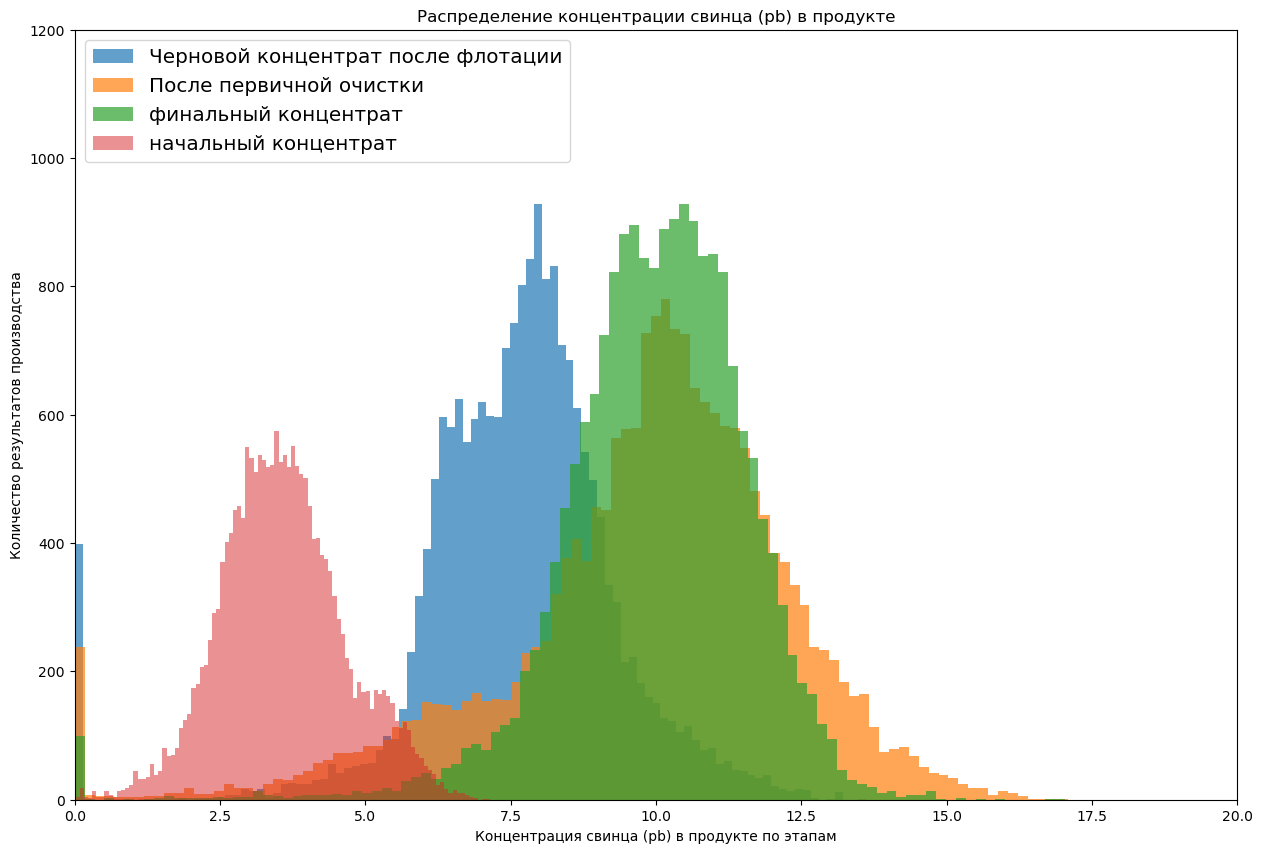

In [39]:
    plt.figure(figsize=[15,10])
    plt.xlim([0, 20])
    plt.ylim([0, 1200])
    plt.hist(list_with_pb['rougher.output.concentrate_pb'], bins=100, label = 'Черновой концентрат после флотации', alpha=0.7)
    plt.hist(list_with_pb['primary_cleaner.output.concentrate_pb'], bins=100, label = 'После первичной очистки', alpha=0.7)
    plt.hist(list_with_pb['final.output.concentrate_pb'], bins=100, label = 'финальный концентрат', alpha=0.7)
    plt.hist(df_full['rougher.input.feed_pb'], bins=100, label = 'начальный концентрат', alpha=0.5)
    plt.xlabel('Концентрация свинца (pb) в продукте по этапам')
    plt.ylabel('Количество результатов производства')
    plt.legend(loc='upper left', fontsize='x-large')
    plt.title('Распределение концентрации свинца (pb) в продукте')
    plt.show()

Концентрация свинца снижается, но не так явно, как у серебра.


In [40]:
print(list_with_au.median())

final.output.concentrate_au              45.011244
primary_cleaner.output.concentrate_au    32.841295
rougher.output.concentrate_au            20.280214
dtype: float64


In [41]:
print(list_with_ag.median())

final.output.concentrate_ag               5.066039
primary_cleaner.output.concentrate_ag     8.507298
rougher.output.concentrate_ag            12.098115
dtype: float64


In [42]:
print(list_with_pb.median())

final.output.concentrate_pb              10.102264
primary_cleaner.output.concentrate_pb    10.142270
rougher.output.concentrate_pb             7.742580
dtype: float64


Вывод по этому исследованию: после каждого этапа повышается концентрация золота, падает концентрация серебра.
Концентрация у свинца увеличивается после первого этапа, дальше не меняется. Это видно по графикам и по медианным значениям

Посмотрим, что у нас дальше идет: Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [43]:
# plt.figure(figsize=(10,7))
# plt.hist(df_tr['rougher.input.feed_size'], bins=100, label='Размер гранул исходного сырья в обучающей выборке', alpha=0.7)
# plt.hist(df_ts['rougher.input.feed_size'], bins=100, label='Размер гранул исходного сырья в тестовой выборке', alpha=0.7)
# plt.legend(loc='upper right')
# plt.show()

Построим график сравнения с помощью библиотеки SNS, заодно вспомним её

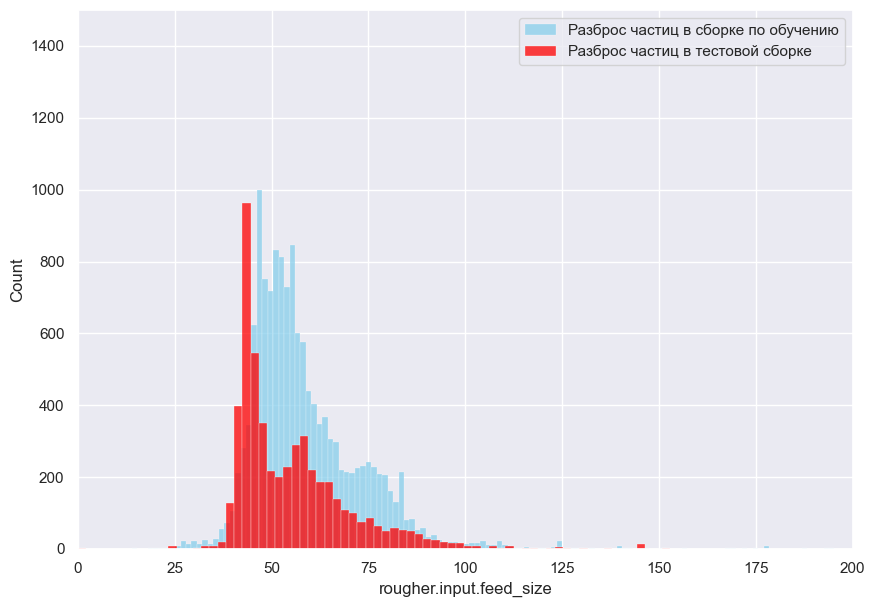

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,7))

sns.histplot(data = df_tr, x="rougher.input.feed_size", color="skyblue", label="Разброс частиц в сборке по обучению", kde=False)
sns.histplot(data = df_ts, x='rougher.input.feed_size', color="red", label="Разброс частиц в тестовой сборке", kde=False)

plt.legend(loc='upper right')
plt.xlim([0, 200])
plt.ylim([0, 1500])
plt.show()

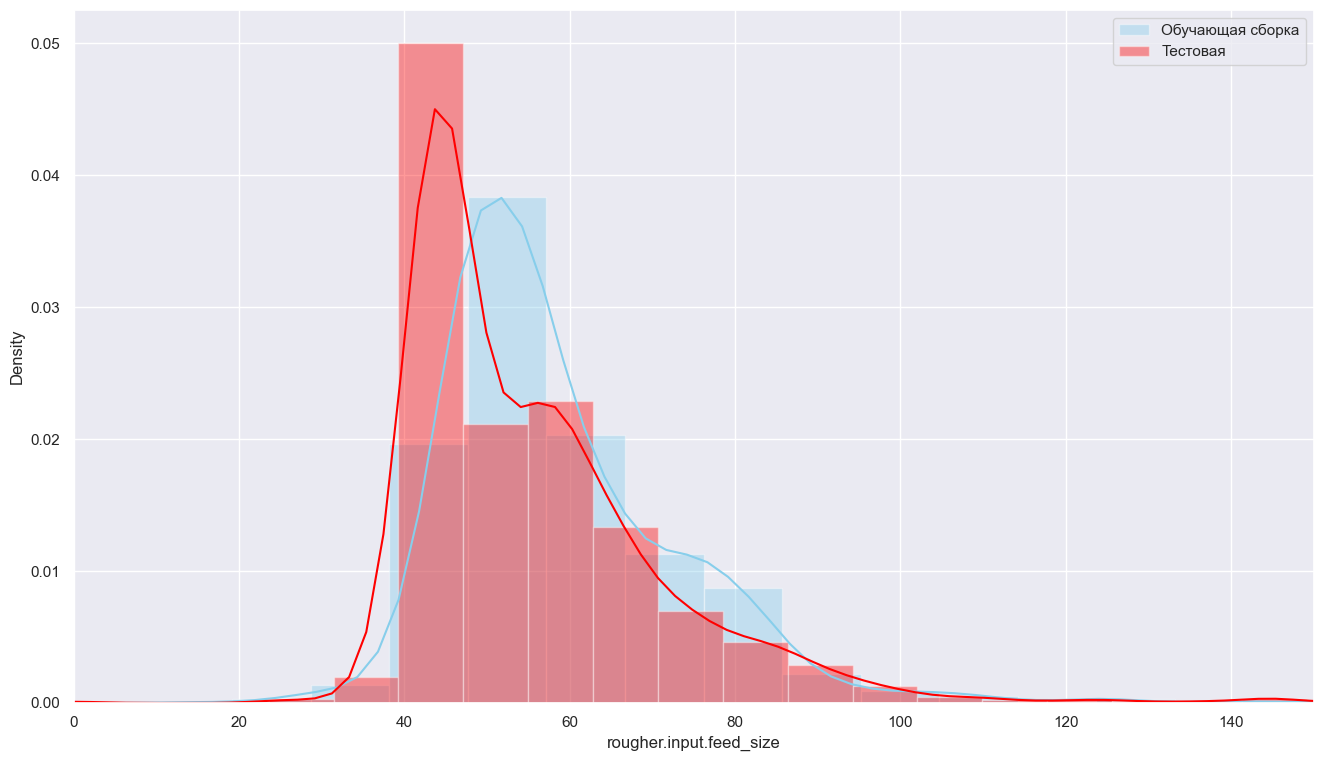

In [45]:
plt.figure(figsize=(16,9))
sns.distplot(df_tr['rougher.input.feed_size'], color="skyblue", label='Обучающая сборка')
sns.distplot(df_ts['rougher.input.feed_size'], color='red', label='Тестовая')
plt.xlim(0,150)
plt.legend()

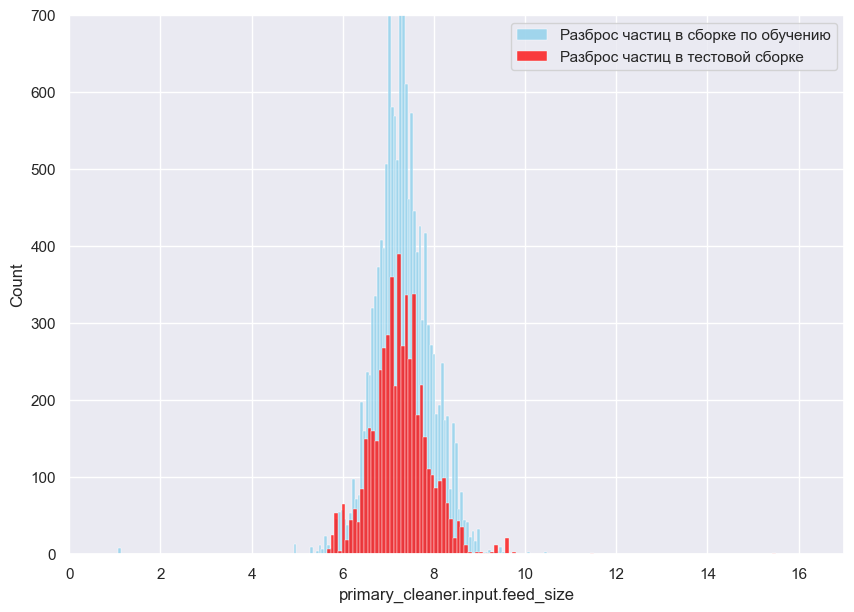

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,7))

sns.histplot(data = df_tr, x="primary_cleaner.input.feed_size", color="skyblue", label="Разброс частиц в сборке по обучению", kde=False)
sns.histplot(data = df_ts, x='primary_cleaner.input.feed_size', color="red", label="Разброс частиц в тестовой сборке", kde=False)

plt.legend(loc='upper right')
plt.xlim([0, 17])
plt.ylim([0, 700])
plt.show()

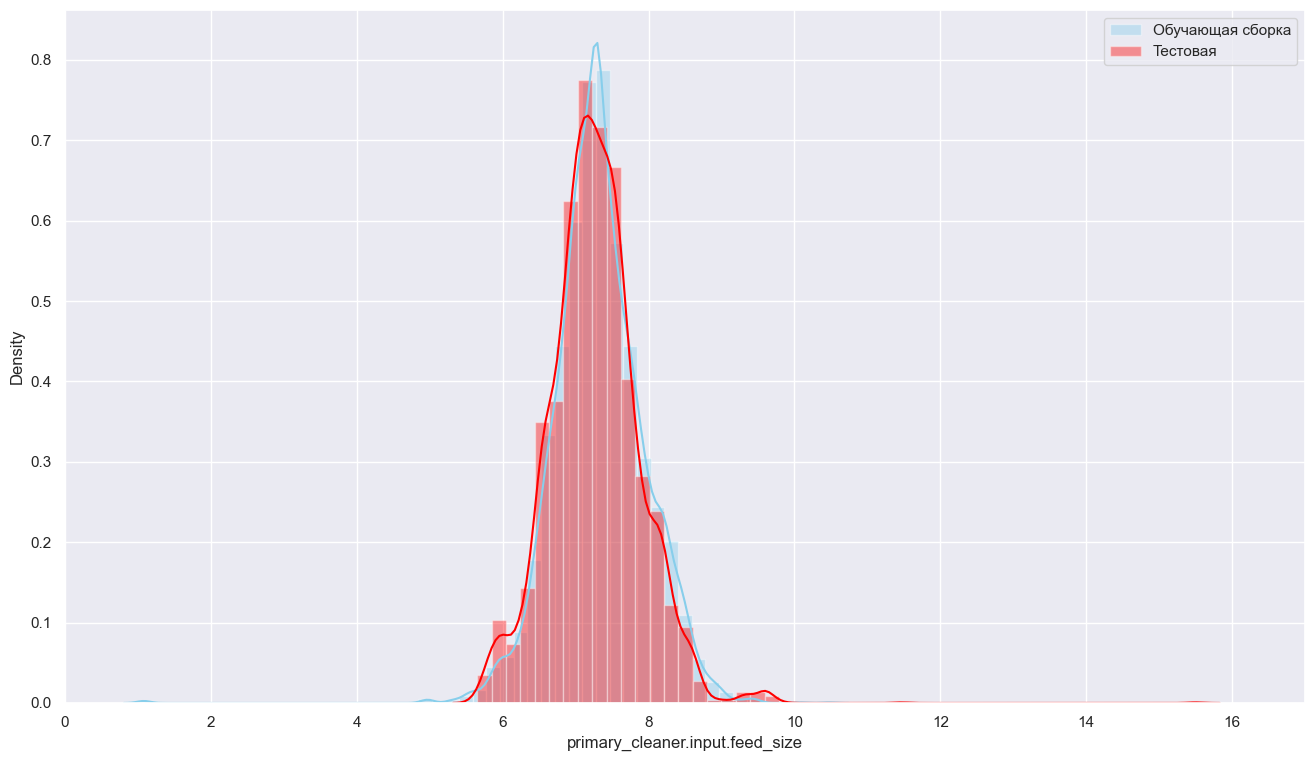

In [47]:
plt.figure(figsize=(16,9))
sns.distplot(df_tr['primary_cleaner.input.feed_size'], color="skyblue", label='Обучающая сборка')
sns.distplot(df_ts['primary_cleaner.input.feed_size'], color='red', label='Тестовая')
plt.xlim(0,17)
plt.legend()

Ввывод: по двум графикам мы видим, что в среднем разброс частиц находится в одном диапазоне.

2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

попробуем немного модернизировать ранее написанный цикл под новую задач

In [48]:
rougher_input1 = []
rougher_output1 = []
final_output1 = []

In [49]:
for i in df_full.columns:
    if 'rougher.input.feed_' in i:
        rougher_input1.append(i)
    elif 'rougher.output.concentrate_' in i:
        rougher_output1.append(i)
    elif 'final.output.concentrate_' in i:
        final_output1.append(i)

In [50]:
rougher_input1.remove('rougher.input.feed_rate') #как-то совсем не оптимально, но лучше не придумал
rougher_input1.remove('rougher.input.feed_size')

In [51]:
rougher_input1

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au']

In [52]:
rougher_output1

['rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [53]:
final_output1

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au']

In [54]:
rougher_input = df_full[rougher_input1]
rougher_output = df_full[rougher_output1]
final_output = df_full [final_output1]

In [55]:
rougher_input['final_concentration']=rougher_input.sum(axis=1)
rougher_output['final_concentration'] = rougher_output.sum(axis=1)
final_output['final_concentration'] = final_output.sum(axis=1)
#почему ошибка? как убрать?

In [56]:
rougher_input

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,final_concentration
0,6.100378,2.284912,36.808594,6.486150,51.680034
1,6.161113,2.266033,35.753385,6.478583,50.659114
2,6.116455,2.159622,35.971630,6.362222,50.609929
3,6.043309,2.037807,36.862241,6.118189,51.061546
4,6.060915,1.786875,34.347666,5.663707,47.859163
...,...,...,...,...,...
19434,6.091855,4.617558,37.369774,5.335862,53.415050
19435,6.121323,4.144989,38.591551,4.838619,53.696482
19436,5.970515,4.020002,40.074026,4.525061,54.589604
19437,6.048130,3.902537,39.713906,4.362781,54.027355


In [57]:
# rougher_input_final =[]
# rougher_output_final=[]
# final_output_final=[]

In [58]:
# rougher_input_final['final_concentration'] = rougher_input.sum(axis=1)
# rougher_output_final['final_concentration'] = rougher_output.sum(axis=1)
# final_output_final['final_concentration'] = final_output.sum(axis=1)

In [59]:
# rougher_input_final

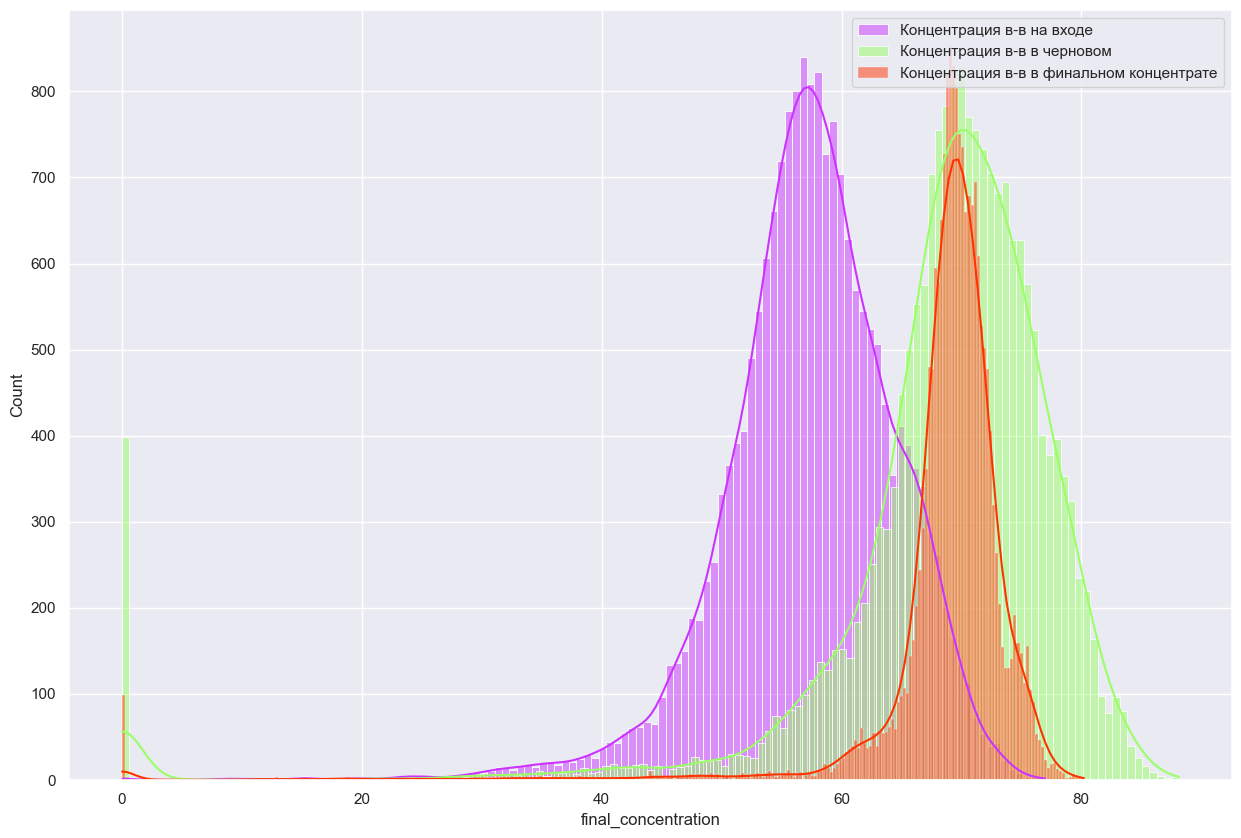

In [60]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))

sns.histplot(rougher_input['final_concentration'], color="#CC33FF", label="Концентрация в-в на входе", kde=True, )
sns.histplot(rougher_output['final_concentration'], color="#99FF66", label="Концентрация в-в в черновом", kde=True, )
sns.histplot(final_output['final_concentration'], color="#FF3300", label="Концентрация в-в в финальном концентрате", kde=True, )

plt.legend(loc='upper right')
#plt.xlim([0, 50])
#plt.ylim([0, 700])
plt.show()

Всё хорошо и красиво, но и здесь сильные выборы на 0, надо всё-таки с ними будет что-то сделать
Нулевые значения есть смысл рассматривать как выбросы, нам ничем в процессе обучения модели они не помогут, поэтому есть смысл от них избавиться в датасете df_tr, на котором далее будет обучать модель


In [61]:
df_tr=df_tr[df_tr['rougher.output.concentrate_au'] >= 1]
df_tr=df_tr[df_tr['rougher.output.concentrate_ag'] >= 1]
df_tr=df_tr[df_tr['rougher.output.concentrate_pb'] >= 1]
df_tr=df_tr[df_tr['primary_cleaner.output.concentrate_au'] >= 1]
df_tr=df_tr[df_tr['primary_cleaner.output.concentrate_ag'] >= 1]
df_tr=df_tr[df_tr['primary_cleaner.output.concentrate_pb'] >= 1]
df_tr=df_tr[df_tr['final.output.concentrate_au'] >= 1]
df_tr=df_tr[df_tr['final.output.concentrate_ag'] >= 1]
df_tr=df_tr[df_tr['final.output.concentrate_pb'] >= 1]

#на будущее, можно было через df_tr= df_tr.query('`rougher.output.concentrate_au` >=1')
#дальше нам надо для target_test данные из общей сборки, поэтому создадим переменную 
#df_fulll и по ней так же просортируем эти значения
# df_fulll= df_full.query('`rougher.output.concentrate_au` >=1')
# df_fulll= df_full.query('`rougher.output.concentrate_ag` >=1')
# df_fulll= df_full.query('`rougher.output.concentrate_pb` >=1')

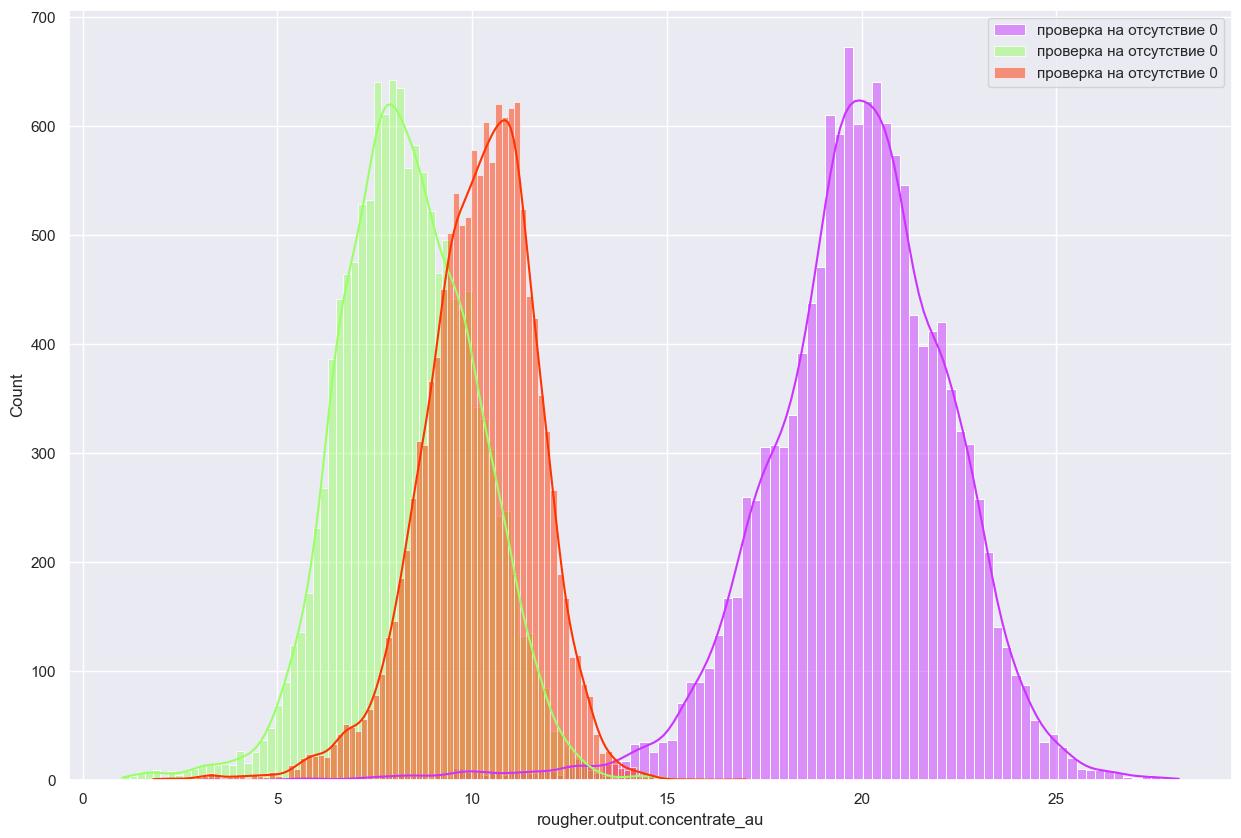

In [62]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))

sns.histplot(df_tr['rougher.output.concentrate_au'], color="#CC33FF", label="проверка на отсутствие 0", kde=True, )
sns.histplot(df_tr['primary_cleaner.output.concentrate_ag'], color="#99FF66", label="проверка на отсутствие 0", kde=True, )
sns.histplot(df_tr['final.output.concentrate_pb'], color="#FF3300", label="проверка на отсутствие 0", kde=True, )

plt.legend(loc='upper right')
#plt.xlim([0, 50])
#plt.ylim([0, 700])
plt.show()

Вывод по этому исследованию: 

после каждого этапа повышается концентрация золота, падает концентрация серебра. Концентрация у свинца увеличивается после первого этапа, дальше не меняется. Это видно по графикам и по медианным значениям

По двум графикам мы видим, что в среднем разброс частиц находится в одном диапазоне.

Около нулевые значения мы выкидываем из тренировочного датасета


## Модель

In [63]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13556 entries, 0 to 14148
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         13556 non-null  float64
 1   final.output.concentrate_pb                         13556 non-null  float64
 2   final.output.concentrate_sol                        13556 non-null  float64
 3   final.output.concentrate_au                         13556 non-null  float64
 4   final.output.recovery                               13556 non-null  float64
 5   final.output.tail_ag                                13556 non-null  float64
 6   final.output.tail_pb                                13556 non-null  float64
 7   final.output.tail_sol                               13556 non-null  float64
 8   final.output.tail_au                                13556 non-null  float64


3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.
Вам пригодятся формулы метрик качества:

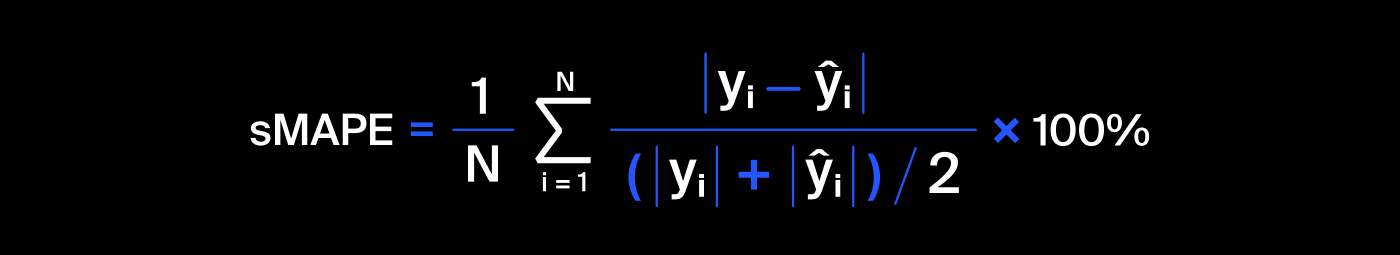

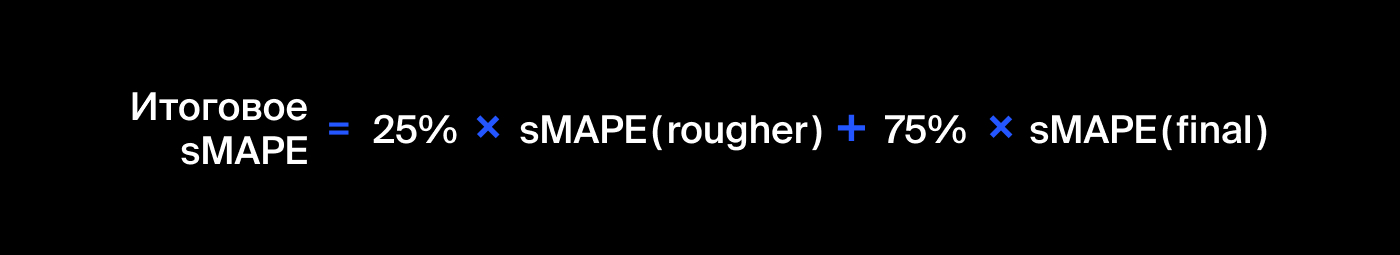

In [64]:
def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

In [65]:
def smape_final(smape_rougher, smape_final):
    a= 0.25*smape_rougher + 0.75*smape_final
    return a

Проанализировав тестовую и обучающую сборку, прихожу к выводу, что из обучающей можно удалить всё лишнее. Так как многие вещи это результаты расчетов, так же дальнейшие параметры, поэтому делаем фокус на rougher значения веществ

In [66]:
df_train1 = []

In [67]:
for i in df_tr.columns:
    for y in df_ts.columns:
        if i == y:
            df_train1.append(i)

In [68]:
df_train = df_tr[df_train1]

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13556 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13556 non-null  float64
 1   primary_cleaner.input.sulfate               13556 non-null  float64
 2   primary_cleaner.input.depressant            13556 non-null  float64
 3   primary_cleaner.input.feed_size             13556 non-null  float64
 4   primary_cleaner.input.xanthate              13556 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13556 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13556 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13556 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13556 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13556 non-null  float64
 10  primary_cl

Начнем работать с моделям, последующие расчеты будем делать с помощью Gridsearch, у него встроена кросс валидация, поэтому смысла делить треин тест на треин и валид смысла не вижу, проверять сразу на тесте будем

надо создать признаки и цель, цель написана в тз, это rougher.output.recovery и 'final.output.recovery', призраки берем из начала процесса

Тут есть вот один вопрос, а нужны ли нам в нашей модели химические процессы, ведь по сути, это регулируется человеком, а не мы предсказываем моделью. Возможно, всё по процессу тоже можно убрать из расчета, оставить только саму руду

In [70]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null   float64
 10  primary_clea

In [71]:
target_rougher_train = []
features_rougher_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
target_rougher_train = df_tr['rougher.output.recovery']
target_rougher_final_train = df_tr['final.output.recovery']
features_rougher_test = df_ts.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
target_rougher_test = df_ts['rougher.output.recovery']
target_rougher_final_test = df_ts['final.output.recovery']

In [72]:
target_rougher_test

0       89.993421
1       88.089657
2       88.412756
3       87.360133
4       83.236367
          ...    
5285    95.172585
5286    94.575036
5287    93.018138
5288    92.599042
5289    91.177695
Name: rougher.output.recovery, Length: 5290, dtype: float64

In [73]:
target_rougher_final_test

0       70.273583
1       68.910432
2       68.143213
3       67.776393
4       61.467078
          ...    
5285    68.919891
5286    68.440582
5287    67.092759
5288    68.061186
5289    71.699976
Name: final.output.recovery, Length: 5290, dtype: float64

In [74]:
features_rougher_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13556 entries, 0 to 14148
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13556 non-null  float64
 1   primary_cleaner.input.depressant            13556 non-null  float64
 2   primary_cleaner.input.feed_size             13556 non-null  float64
 3   primary_cleaner.input.xanthate              13556 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13556 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13556 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13556 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13556 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13556 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13556 non-null  float64
 10  primary_cl

In [75]:
target_rougher_train

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 13556, dtype: float64

In [76]:
target_rougher_final_train

0        70.541216
1        69.266198
2        68.116445
3        68.347543
4        66.927016
           ...    
14144    73.755150
14145    69.049291
14146    67.002189
14147    65.523246
14148    70.281454
Name: final.output.recovery, Length: 13556, dtype: float64

Увы, нашего smape нет в стандартных score у грида, поэтому придется создавать свой

Чтоб не путаться, у нас 2 модели, 1-я:
Обучение по

Признак по трейн, цель
- features_rougher_train
- target_rougher_train

Тестовая, признаки и таргет:

- features_rougher_test
- target_rougher_test


Вторая модель:
- features_rougher_train
- target_rougher_final_train

Тест

- features_rougher_test
- target_rougher_final_test


In [77]:
score = make_scorer(smape, greater_is_better=False)

Первое исследование сделаем с помощью метода Случайный лес

In [78]:
parameters_fr = {'max_depth': range(1,10), 'n_estimators': range(1,20)}

In [79]:
fr_grid = GridSearchCV(RandomForestRegressor(random_state=state), param_grid = parameters_fr, cv=5, scoring=score, n_jobs = -1)

In [80]:
%%time
model_forest_rougher = fr_grid.fit(features_rougher_train, target_rougher_train)
#model_forest_rougher_predict = model_forest_rougher.predict(features_rougher_test)
print(model_forest_rougher.best_estimator_)
print('sMAPE rougher',model_forest_rougher.best_score_*-1) #почему выдает отрицательное значение я так и не могу понять, пришлось вот так решить

RandomForestRegressor(max_depth=9, n_estimators=18,
                      random_state=RandomState(MT19937) at 0x15C58F840)
sMAPE rougher 6.437206505625127
CPU times: user 7.01 s, sys: 589 ms, total: 7.6 s
Wall time: 2min 45s


In [81]:
world_for_help = model_forest_rougher.best_score_*-1

In [82]:
%%time
model_forest_rougher_final = fr_grid.fit(features_rougher_train, target_rougher_final_train)
#model_forest_rougher_predict_final = model_forest_rougher_final.predict(features_rougher_test)
print(model_forest_rougher_final.best_estimator_)
print('sMAPE финальное', model_forest_rougher_final.best_score_*-1)

RandomForestRegressor(max_depth=4, n_estimators=3,
                      random_state=RandomState(MT19937) at 0x15C25EE40)
sMAPE финальное 8.910862591396716
CPU times: user 2.71 s, sys: 465 ms, total: 3.18 s
Wall time: 2min 40s


In [83]:
print('Итоговое sMAPE', smape_final(world_for_help, model_forest_rougher_final.best_score_*-1))

Итоговое sMAPE 8.29244856995382


Сравним с результатами линейной регрессии

Первая модель

In [84]:
reg = LinearRegression()
parameters = {}
grid_lin = GridSearchCV(reg, param_grid = parameters, n_jobs = -1, scoring=score)
model_lin_rougher = grid_lin.fit(features_rougher_train, target_rougher_train)
#model_lin_rougher_predict = model_lin_rougher.predict(features_rougher_test)
print(model_lin_rougher.best_score_*-1)
model_lin_rougher_final = grid_lin.fit(features_rougher_train, target_rougher_final_train)
#model_lin_rougher_predict_final = model_lin_rougher_final.predict(features_rougher_test)
print(model_lin_rougher_final.best_score_*-1)
print('Итоговое sMAPE линейной регрессии', smape_final(model_lin_rougher.best_score_*-1, 
                                                       model_lin_rougher_final.best_score_*-1))

7.300164769761453
11.036844490716955
Итоговое sMAPE линейной регрессии 11.036844490716955


In [85]:
%%time
model_lin_cv = LinearRegression()
model_lin_rougher_cv = cross_val_score(model_lin_cv, features_rougher_train, target_rougher_train, cv=5, scoring=score)
mean_model_lin_rougher_cv = sum(model_lin_rougher_cv)/5
print ('sMAPE rougher', mean_model_lin_rougher_cv*-1)


sMAPE rougher 7.300164769761442
CPU times: user 714 ms, sys: 68.1 ms, total: 782 ms
Wall time: 106 ms


In [86]:
%%time
model_lin_rougher_cv_final = cross_val_score(model_lin_cv, features_rougher_train, target_rougher_final_train, cv=5, scoring=score)
mean_model_lin_rougher_cv_final = sum(model_lin_rougher_cv_final)/5
print ('sMAPE rougher final', mean_model_lin_rougher_cv_final*-1)

sMAPE rougher final 11.036844490716902
CPU times: user 605 ms, sys: 182 ms, total: 787 ms
Wall time: 106 ms


In [87]:
print('Итоговое sMAPE линейной регрессии', smape_final(mean_model_lin_rougher_cv*-1, mean_model_lin_rougher_cv_final*-1))

Итоговое sMAPE линейной регрессии 10.102674560478038


In [88]:
%%time
parameters_tr = parameters_tr = {'max_depth' : range(1,30)}
tr_grid = GridSearchCV(DecisionTreeRegressor(random_state=12345), 
                       param_grid = parameters_tr, n_jobs = -1, verbose = False, scoring = score)
model_tree_rougher = tr_grid.fit(features_rougher_train, target_rougher_train)
#model_tree_rougher_predict = model_tree_rougher.predict(features_rougher_test)
print(model_tree_rougher.best_estimator_)
print('sMAPE rougher',model_tree_rougher.best_score_*-1)


DecisionTreeRegressor(max_depth=3, random_state=12345)
sMAPE rougher 6.918417200038651
CPU times: user 1.03 s, sys: 182 ms, total: 1.21 s
Wall time: 9.16 s


In [89]:
for_help=model_tree_rougher.best_score_*-1

In [90]:
%%time
model_tree_rougher_final = tr_grid.fit(features_rougher_train, target_rougher_final_train)
#model_tree_rougher_predict_final = model_tree_rougher_final.predict(features_rougher_test)
print(model_tree_rougher.best_estimator_)
print('sMAPE rougher',model_tree_rougher.best_score_*-1)


DecisionTreeRegressor(max_depth=2, random_state=12345)
sMAPE rougher 9.24008734794532
CPU times: user 351 ms, sys: 66.2 ms, total: 417 ms
Wall time: 9.76 s


In [91]:
print('Итоговое sMAPE для дерева', smape_final(for_help, model_tree_rougher.best_score_*-1))

Итоговое sMAPE для дерева 8.659669810968653


Лучшие показатели получились у случайного леса. Дерево решений где-то по середине, линейная регрессия значительно уступает, но скорость расчета у неё очень высокая на фоне остальных. 

Проверим теперь лучшею модель на тестовой выборке

In [92]:
model_forest_rougher = RandomForestRegressor(max_depth=4, n_estimators=3,
                      random_state= state).fit(features_rougher_train, target_rougher_train)

In [93]:
prediction_forest_rougher_predict = model_forest_rougher.predict(features_rougher_test)
print(smape(target_rougher_test, prediction_forest_rougher_predict))
#предварительно это фиаско пока что, но, возможно, гиперпараметры подобраны очень слабо, иначе очень долго считает

8.37554193407198


In [94]:
model_forest_rougher_final = RandomForestRegressor(max_depth=5, n_estimators=2,
                      random_state=state).fit(features_rougher_train, target_rougher_final_train)

In [95]:
model_forest_rougher_predict_final = model_forest_rougher_final.predict(features_rougher_test)
print(smape(target_rougher_final_test, model_forest_rougher_predict_final))

10.21651552195218


In [96]:
print('Итоговое sMAPE для случайного леса', smape_final(smape(target_rougher_test, prediction_forest_rougher_predict),
                                               smape(target_rougher_final_test, model_forest_rougher_predict_final)))

Итоговое sMAPE для случайного леса 9.75627212498213


In [97]:
#проверим на дамми... будет обидно, если дамми окажется лучше =)
dummy_regr_rougher = DummyRegressor(strategy="mean") 
dummy_regr_rougher.fit(features_rougher_train, target_rougher_train) 
pred_rougher = dummy_regr_rougher.predict(features_rougher_test)
print(smape(target_rougher_test, pred_rougher))

9.04432394303075


In [98]:
dummy_regr_rougher = DummyRegressor(strategy="mean") 
dummy_regr_rougher.fit(features_rougher_train, target_rougher_final_train) 
pred_rougher_final = dummy_regr_rougher.predict(features_rougher_test)
print(smape(target_rougher_final_test, pred_rougher_final))

10.093185328795894


In [99]:
print('Итоговое sMAPE для дамми', smape_final(smape(target_rougher_test, pred_rougher),
                                               smape(target_rougher_final_test, pred_rougher_final)))

Итоговое sMAPE для дамми 9.830969982354608


Выводы:

предварительные выводы:

В процессе работы были сделаны следующие выводы:

Большое количество данных, т.е. в будущем, скорей всего не потребуются методы для увеличения выборки. В целом у нас задача регрессии

пропуски есть, но их немного. Для их обработки было несколько вариантов: заменить смежными значениями, либо заменить медианой, пока выбрал смежными.

Явные дубликаты отсутствуют

Удалил стобец Data

Корреляция 1 в 1 отсутствует

Посчитал значение MAE, показатель получился очень низким

добавил из таблицы Full значения по требуемогу параметру в таблицу тест

после каждого этапа повышается концентрация золота, падает концентрация серебра. Концентрация у свинца увеличивается после первого этапа, дальше не меняется. Это видно по графикам и по медианным значениям

По двум графикам мы видим, что в среднем разброс частиц находится в одном диапазоне.

Около нулевые значения мы выкидываем из тренировочного датасета

Модель, которая показала наилучшие результаты - случайный лес